In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/black-friday-sales-eda/train.csv


# Importing Necessary Libraries

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Tasks to perform

Purchase column is the Target Variable, perform Univariate Analysis and Bivariate Analysis w.r.t the Purchase.

Masked in the column description means already converted from categorical value to numerical column.

Below mentioned points are just given to get you started with the dataset, not mandatory to follow the same sequence.

## DATA PREPROCESSING

- Check basic statistics of dataset

- Check for missing values in the data

- Check for unique values in data

- Perform EDA

- Purchase Distribution

- Check for outliers

- Analysis by Gender, Marital Status, occupation, occupation vs purchase , purchase by city, purchase by age group, etc

- Drop unnecessary fields

- Convert categorical data into integer using map function (e.g 'Gender' column)

- Missing value treatment

- Rename columns

- Fill nan values

- Map range variables into integers (e.g 'Age' column)

## Data Visualisation

- Visualize individul column
- Age vs Purchased
- Occupation vs Purchased
- Product_category_1 vs Purchased
- Product_category_2 vs Purchased
- Product_category_3 vs Purchased
- City category pie chart
- Check for more possible plots

# Data Loading

In [3]:
df = pd.read_csv("/kaggle/input/black-friday-sales-eda/train.csv")
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


The `df.info()` method in pandas is used to get a concise summary of a DataFrame. Here's a detailed explanation of what this method does and the information it provides:

### Purpose
`df.info()` gives you a quick overview of the DataFrame, including the data types of each column, the number of non-null entries, memory usage, and more. It's especially useful for understanding the structure and contents of your DataFrame at a glance.



In [5]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

The code `df.isnull().sum()` is used in pandas to check for missing values (NaNs) in a DataFrame and to summarize the count of missing values for each column. Here's a detailed explanation of how this code works and what the output indicates:

### Explanation of the Code

1. **`df.isnull()`**:
   - This function checks each element in the DataFrame `df` to see if it is a null value (NaN).
   - It returns a DataFrame of the same shape as `df`, where each element is a boolean: `True` if the element is null and `False` otherwise.

2. **`.sum()`**:
   - When applied to a DataFrame, the `sum()` function by default operates along columns (axis=0), adding up the `True` values for each column.
   - Since `True` is treated as 1 and `False` is treated as 0 in numerical operations, `sum()` effectively counts the number of `True` values (i.e., the number of null values) in each column.


### Interpretation of the Output

- **User_ID, Product_ID, Gender, Age, Occupation, City_Category, Stay_In_Current_City_Years, Marital_Status, Product_Category_1, Purchase**: 
  - These columns have 0 missing values, indicating that every entry in these columns is filled.

- **Product_Category_2**: 
  - This column has 173,638 missing values. It means that 173,638 entries in this column are null (NaN).

- **Product_Category_3**: 
  - This column has 383,247 missing values, indicating a significant amount of missing data in this column.

### Practical Use

This information is crucial for data cleaning and preprocessing. Knowing which columns have missing values and how many are missing helps in deciding how to handle them. Common strategies include:
- **Removing rows or columns with missing values**: If the missing values are few or if the column with missing values is not important.
- **Imputing missing values**: Filling in missing values with a specific value (like mean, median, mode) or using more sophisticated imputation techniques.



In summary, `df.isnull().sum()` is a handy tool for quickly assessing the presence and extent of missing data in a DataFrame.

In [6]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


The `df.describe()` method in pandas provides a summary of statistical information about the numerical (and optionally, categorical) columns in a DataFrame. This method is very useful for getting a quick overview of the dataset's distribution and central tendency.

### Explanation of the Code

1. **`df.describe()`**:
   - This function calculates various summary statistics for each numerical column in the DataFrame `df`.
   - By default, it includes only numerical columns, but you can include other types of columns (like categorical) by passing the `include` parameter.



In [7]:
df['Gender'].value_counts()

Gender
M    414259
F    135809
Name: count, dtype: int64

In [8]:
col = df.columns
col

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [9]:
for i in col:
    print(df[i].value_counts(), "\n\n")

User_ID
1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: count, Length: 5891, dtype: int64 


Product_ID
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: count, Length: 3631, dtype: int64 


Gender
M    414259
F    135809
Name: count, dtype: int64 


Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64 


Occupation
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: count, dtype: int64 


City_Category
B    23117


### Explanation of the Code

1. **`col = df.columns`**:
   - This line retrieves the column names of the DataFrame `df` and stores them in the variable `col`. `df.columns` returns an Index object containing the names of the columns in the DataFrame.

2. **`for i in col:`**:
   - This line initiates a for loop that iterates over each column name stored in `col`.

3. **`print(df[i].value_counts(), "\n\n")`**:
   - `df[i]` accesses the column `i` of the DataFrame `df`.
   - `df[i].value_counts()` calculates the frequency of each unique value in the column `i`.
   - `print(df[i].value_counts(), "\n\n")` prints the value counts for the column `i`, followed by two newline characters (`\n\n`) to add some space between the outputs of different columns for better readability.

### What the Code Does

- **Retrieves column names**: It first retrieves the names of all the columns in the DataFrame.
- **Iterates through columns**: It then iterates through each column name.
- **Calculates and prints value counts**: For each column, it calculates the frequency of each unique value and prints this information, followed by two newlines to separate the output for different columns.


In [10]:
# Renaming Columns

df.rename(columns = {'City_Category':'City', 'Stay_In_Current_City_Years':'Years_In_City'}, inplace = True)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City,Years_In_City,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969




### Explanation of the Code

1. **`df.rename(columns = {'City_Category':'City', 'Stay_In_Current_City_Years':'Years_In_City'}, inplace = True)`**:
   - `df.rename()` is a pandas method used to rename labels (i.e., column names or row index labels) of a DataFrame.
   - `columns = {'City_Category':'City', 'Stay_In_Current_City_Years':'Years_In_City'}` specifies a dictionary where the keys are the current column names and the values are the new column names.
     - `'City_Category':'City'`: Renames the column `City_Category` to `City`.
     - `'Stay_In_Current_City_Years':'Years_In_City'`: Renames the column `Stay_In_Current_City_Years` to `Years_In_City`.
   - `inplace = True` means that the renaming operation will be done in-place, modifying the original DataFrame `df` directly, rather than returning a new DataFrame with the changes.

2. **`df.head()`**:
   - `df.head()` is a pandas method that returns the first 5 rows of the DataFrame by default. This is useful for quickly inspecting the DataFrame to verify changes or to get an overview of the data.

### What the Code Does

- **Renames specific columns**: It renames the `City_Category` column to `City` and the `Stay_In_Current_City_Years` column to `Years_In_City`.
- **Displays the first few rows**: It then displays the first 5 rows of the modified DataFrame to show the effect of the renaming.



In [11]:
# Fill Null Values

df[df['Product_Category_2'] == 0]

,User_ID,Product_ID,Gender,Age,Occupation,City,Years_In_City,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase


In [12]:
df[df['Product_Category_3'] == 0]

,User_ID,Product_ID,Gender,Age,Occupation,City,Years_In_City,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase


In [13]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(0)
df[df['Product_Category_2']==0]

,User_ID,Product_ID,Gender,Age,Occupation,City,Years_In_City,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,NaN,8370
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,NaN,1422
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,NaN,7969
9,1000005,P00274942,M,26-35,20,A,1,1,8,0.0,NaN,7871
11,1000005,P00014542,M,26-35,20,A,1,1,8,0.0,NaN,3957
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,0.0,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,0.0,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,0.0,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,0.0,NaN,365


The provided code snippet is used to handle missing values in the 'Product_Category_2' column of a DataFrame `df` and then filter the DataFrame to show only the rows where 'Product_Category_2' has been filled with the value 0. Let's break down the code step by step:

### Explanation of the Code

1. **`df['Product_Category_2'] = df['Product_Category_2'].fillna(0)`**:
   - `df['Product_Category_2']`: This accesses the 'Product_Category_2' column of the DataFrame `df`.
   - `.fillna(0)`: This method fills all missing values (NaNs) in the 'Product_Category_2' column with the value 0.
   - `df['Product_Category_2'] =`: This assigns the modified column back to the DataFrame, effectively updating it in place.

2. **`df[df['Product_Category_2']==0]`**:
   - `df['Product_Category_2']==0`: This creates a boolean Series where each element is `True` if the corresponding value in 'Product_Category_2' is 0, and `False` otherwise.
   - `df[...]`: This filters the DataFrame `df` to include only the rows where the condition inside the brackets is `True`.
   - Thus, `df[df['Product_Category_2']==0]` returns a DataFrame containing only the rows where 'Product_Category_2' is 0.

### What the Code Does

- **Fill missing values with 0**: It replaces all NaN values in the 'Product_Category_2' column with 0.
- **Filter rows with 'Product_Category_2' equal to 0**: It then filters and displays the rows where 'Product_Category_2' is 0.


In [14]:
df['Product_Category_3'] = df['Product_Category_3'].fillna(0)
df[df['Product_Category_3']==0]

,User_ID,Product_ID,Gender,Age,Occupation,City,Years_In_City,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,0.0,15227
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,0.0,0.0,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,0.0,0.0,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,0.0,0.0,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,0.0,0.0,365


In [15]:
df[['Product_Category_2', 'Product_Category_3']] =df[['Product_Category_2', 'Product_Category_3']].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   User_ID             550068 non-null  int64 
 1   Product_ID          550068 non-null  object
 2   Gender              550068 non-null  object
 3   Age                 550068 non-null  object
 4   Occupation          550068 non-null  int64 
 5   City                550068 non-null  object
 6   Years_In_City       550068 non-null  object
 7   Marital_Status      550068 non-null  int64 
 8   Product_Category_1  550068 non-null  int64 
 9   Product_Category_2  550068 non-null  int64 
 10  Product_Category_3  550068 non-null  int64 
 11  Purchase            550068 non-null  int64 
dtypes: int64(7), object(5)
memory usage: 50.4+ MB



### Explanation of the Code

1. **Change Data Types to Integers**:


    - **`df[['Product_Category_2', 'Product_Category_3']]`**: This selects the columns `Product_Category_2` and `Product_Category_3` from the DataFrame `df`.
    - **`.astype('int')`**: This method converts the data type of the selected columns to integers. It changes the data type of each element in these columns to `int`.
    - **`df[...] =`**: This assigns the converted columns back to the DataFrame, effectively updating it in place.

2. **Display DataFrame Information**:
    ```python
    df.info()
    ```

    - **`df.info()`**: This method provides a concise summary of the DataFrame. It includes the following information:
        - The class type of the DataFrame.
        - The index range.
        - The column names and their respective data types.
        - The number of non-null entries in each column.
        - The memory usage of the DataFrame.

### What the Code Does

- **Convert Columns to Integers**: The code converts the `Product_Category_2` and `Product_Category_3` columns to integer data types.
- **Display DataFrame Summary**: The code then displays a summary of the DataFrame, including the data types of all columns, which should now show `Product_Category_2` and `Product_Category_3` as integers.



In [16]:
df['Gender'].value_counts()

Gender
M    414259
F    135809
Name: count, dtype: int64

In [17]:
map_dict = {
    'M':0,
    'F':1
}

df['Gender'] = df['Gender'].map(map_dict)

df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City,Years_In_City,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,1,0-17,10,A,2,0,3,0,0,8370
1,1000001,P00248942,1,0-17,10,A,2,0,1,6,14,15200
2,1000001,P00087842,1,0-17,10,A,2,0,12,0,0,1422
3,1000001,P00085442,1,0-17,10,A,2,0,12,14,0,1057
4,1000002,P00285442,0,55+,16,C,4+,0,8,0,0,7969




### Explanation of the Code

1. **Create a Mapping Dictionary**:
    ```python
    map_dict = {
        'M': 0,
        'F': 1
    }
    ```

    - **`map_dict`**: This is a dictionary that maps the values 'M' and 'F' to 0 and 1, respectively.
      - `'M': 0`: This means that 'M' will be mapped to 0.
      - `'F': 1`: This means that 'F' will be mapped to 1.

2. **Map Values in the `Gender` Column**:
    ```python
    df['Gender'] = df['Gender'].map(map_dict)
    ```

    - **`df['Gender']`**: This selects the `Gender` column from the DataFrame `df`.
    - **`.map(map_dict)`**: This method replaces each value in the `Gender` column with the corresponding value from `map_dict`.
      - If the value in `Gender` is 'M', it will be replaced with 0.
      - If the value in `Gender` is 'F', it will be replaced with 1.
    - **`df['Gender'] =`**: This assigns the mapped values back to the `Gender` column, updating it in place.

3. **Display the First Few Rows**:
    ```python
    df.head()
    ```

    - **`df.head()`**: This method returns the first 5 rows of the DataFrame by default. It is used to inspect the DataFrame and verify the changes.

### What the Code Does

- **Create a Mapping Dictionary**: The code first creates a dictionary to map the gender values to numerical values (0 for 'M' and 1 for 'F').
- **Apply the Mapping**: It then applies this mapping to the `Gender` column, replacing 'M' with 0 and 'F' with 1.
- **Display the Updated DataFrame**: Finally, it displays the first few rows of the updated DataFrame to show the effect of the mapping.


In [18]:
df['Age'].value_counts()

Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64

In [19]:
age_mapping = {
    '0-17': 'Youth',
    '18-25': 'Young Adult',
    '26-35': 'Adult',
    '36-45': 'Adult',
    '46-50': 'Adult',
    '51-55': 'Senior',
    '55+': 'Senior'
}

# Apply the mapping using the map function
df['Age'] = df['Age'].map(age_mapping)

df

,User_ID,Product_ID,Gender,Age,Occupation,City,Years_In_City,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,1,Youth,10,A,2,0,3,0,0,8370
1,1000001,P00248942,1,Youth,10,A,2,0,1,6,14,15200
2,1000001,P00087842,1,Youth,10,A,2,0,12,0,0,1422
3,1000001,P00085442,1,Youth,10,A,2,0,12,14,0,1057
4,1000002,P00285442,0,Senior,16,C,4+,0,8,0,0,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,0,Senior,13,B,1,1,20,0,0,368
550064,1006035,P00375436,1,Adult,1,C,3,0,20,0,0,371
550065,1006036,P00375436,1,Adult,15,B,4+,1,20,0,0,137
550066,1006038,P00375436,1,Senior,1,C,2,0,20,0,0,365


In [20]:
df['Years_In_City'].value_counts()

Years_In_City
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: count, dtype: int64

In [21]:
def years(val):
    if "+"in val:
        val = val.replace("+","")
        return val
    return val
        
df['Years_In_City'] = df['Years_In_City'].apply(years)
df['Years_In_City'].value_counts()

Years_In_City
1    193821
2    101838
3     95285
4     84726
0     74398
Name: count, dtype: int64

### Explanation of the Code

1. **Define the `years` Function**:
    ```python
    def years(val):
        if "+" in val:
            val = val.replace("+", "")
            return val
        return val
    ```

    - **`def years(val):`**: This line defines a function named `years` that takes a single argument `val`.
    - **`if "+" in val:`**: This line checks if the character `+` is present in the string `val`.
    - **`val = val.replace("+", "")`**: If `+` is found in `val`, this line removes the `+` character by replacing it with an empty string.
    - **`return val`**: This line returns the modified `val`.
    - If `+` is not found in `val`, the original `val` is returned unchanged.

2. **Apply the `years` Function to the `Years_In_City` Column**:
    ```python
    df['Years_In_City'] = df['Years_In_City'].apply(years)
    ```

    - **`df['Years_In_City']`**: This selects the `Years_In_City` column from the DataFrame `df`.
    - **`.apply(years)`**: This method applies the `years` function to each element in the `Years_In_City` column.
    - **`df['Years_In_City'] =`**: This assigns the modified values back to the `Years_In_City` column, updating it in place.

3. **Count the Unique Values in the `Years_In_City` Column**:
    ```python
    df['Years_In_City'].value_counts()
    ```

    - **`df['Years_In_City']`**: This selects the `Years_In_City` column from the DataFrame `df`.
    - **`.value_counts()`**: This method counts the occurrences of each unique value in the `Years_In_City` column and returns a Series with the counts.

### What the Code Does

- **Define the `years` Function**: The function `years` removes the `+` character from a string if it is present.
- **Apply the Function**: The code applies this function to each value in the `Years_In_City` column, updating the column with the processed values.
- **Count Unique Values**: Finally, the code counts and displays the occurrences of each unique value in the `Years_In_City` column.


In [22]:
df['Years_In_City'] = df['Years_In_City'].astype(int)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   User_ID             550068 non-null  int64 
 1   Product_ID          550068 non-null  object
 2   Gender              550068 non-null  int64 
 3   Age                 550068 non-null  object
 4   Occupation          550068 non-null  int64 
 5   City                550068 non-null  object
 6   Years_In_City       550068 non-null  int64 
 7   Marital_Status      550068 non-null  int64 
 8   Product_Category_1  550068 non-null  int64 
 9   Product_Category_2  550068 non-null  int64 
 10  Product_Category_3  550068 non-null  int64 
 11  Purchase            550068 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 50.4+ MB


# Data Visualisation

In [24]:
col = ['Gender', 'Age', 'Occupation', 'City','Years_In_City','Marital_Status', 'Product_Category_1','Product_Category_2', 'Product_Category_3']

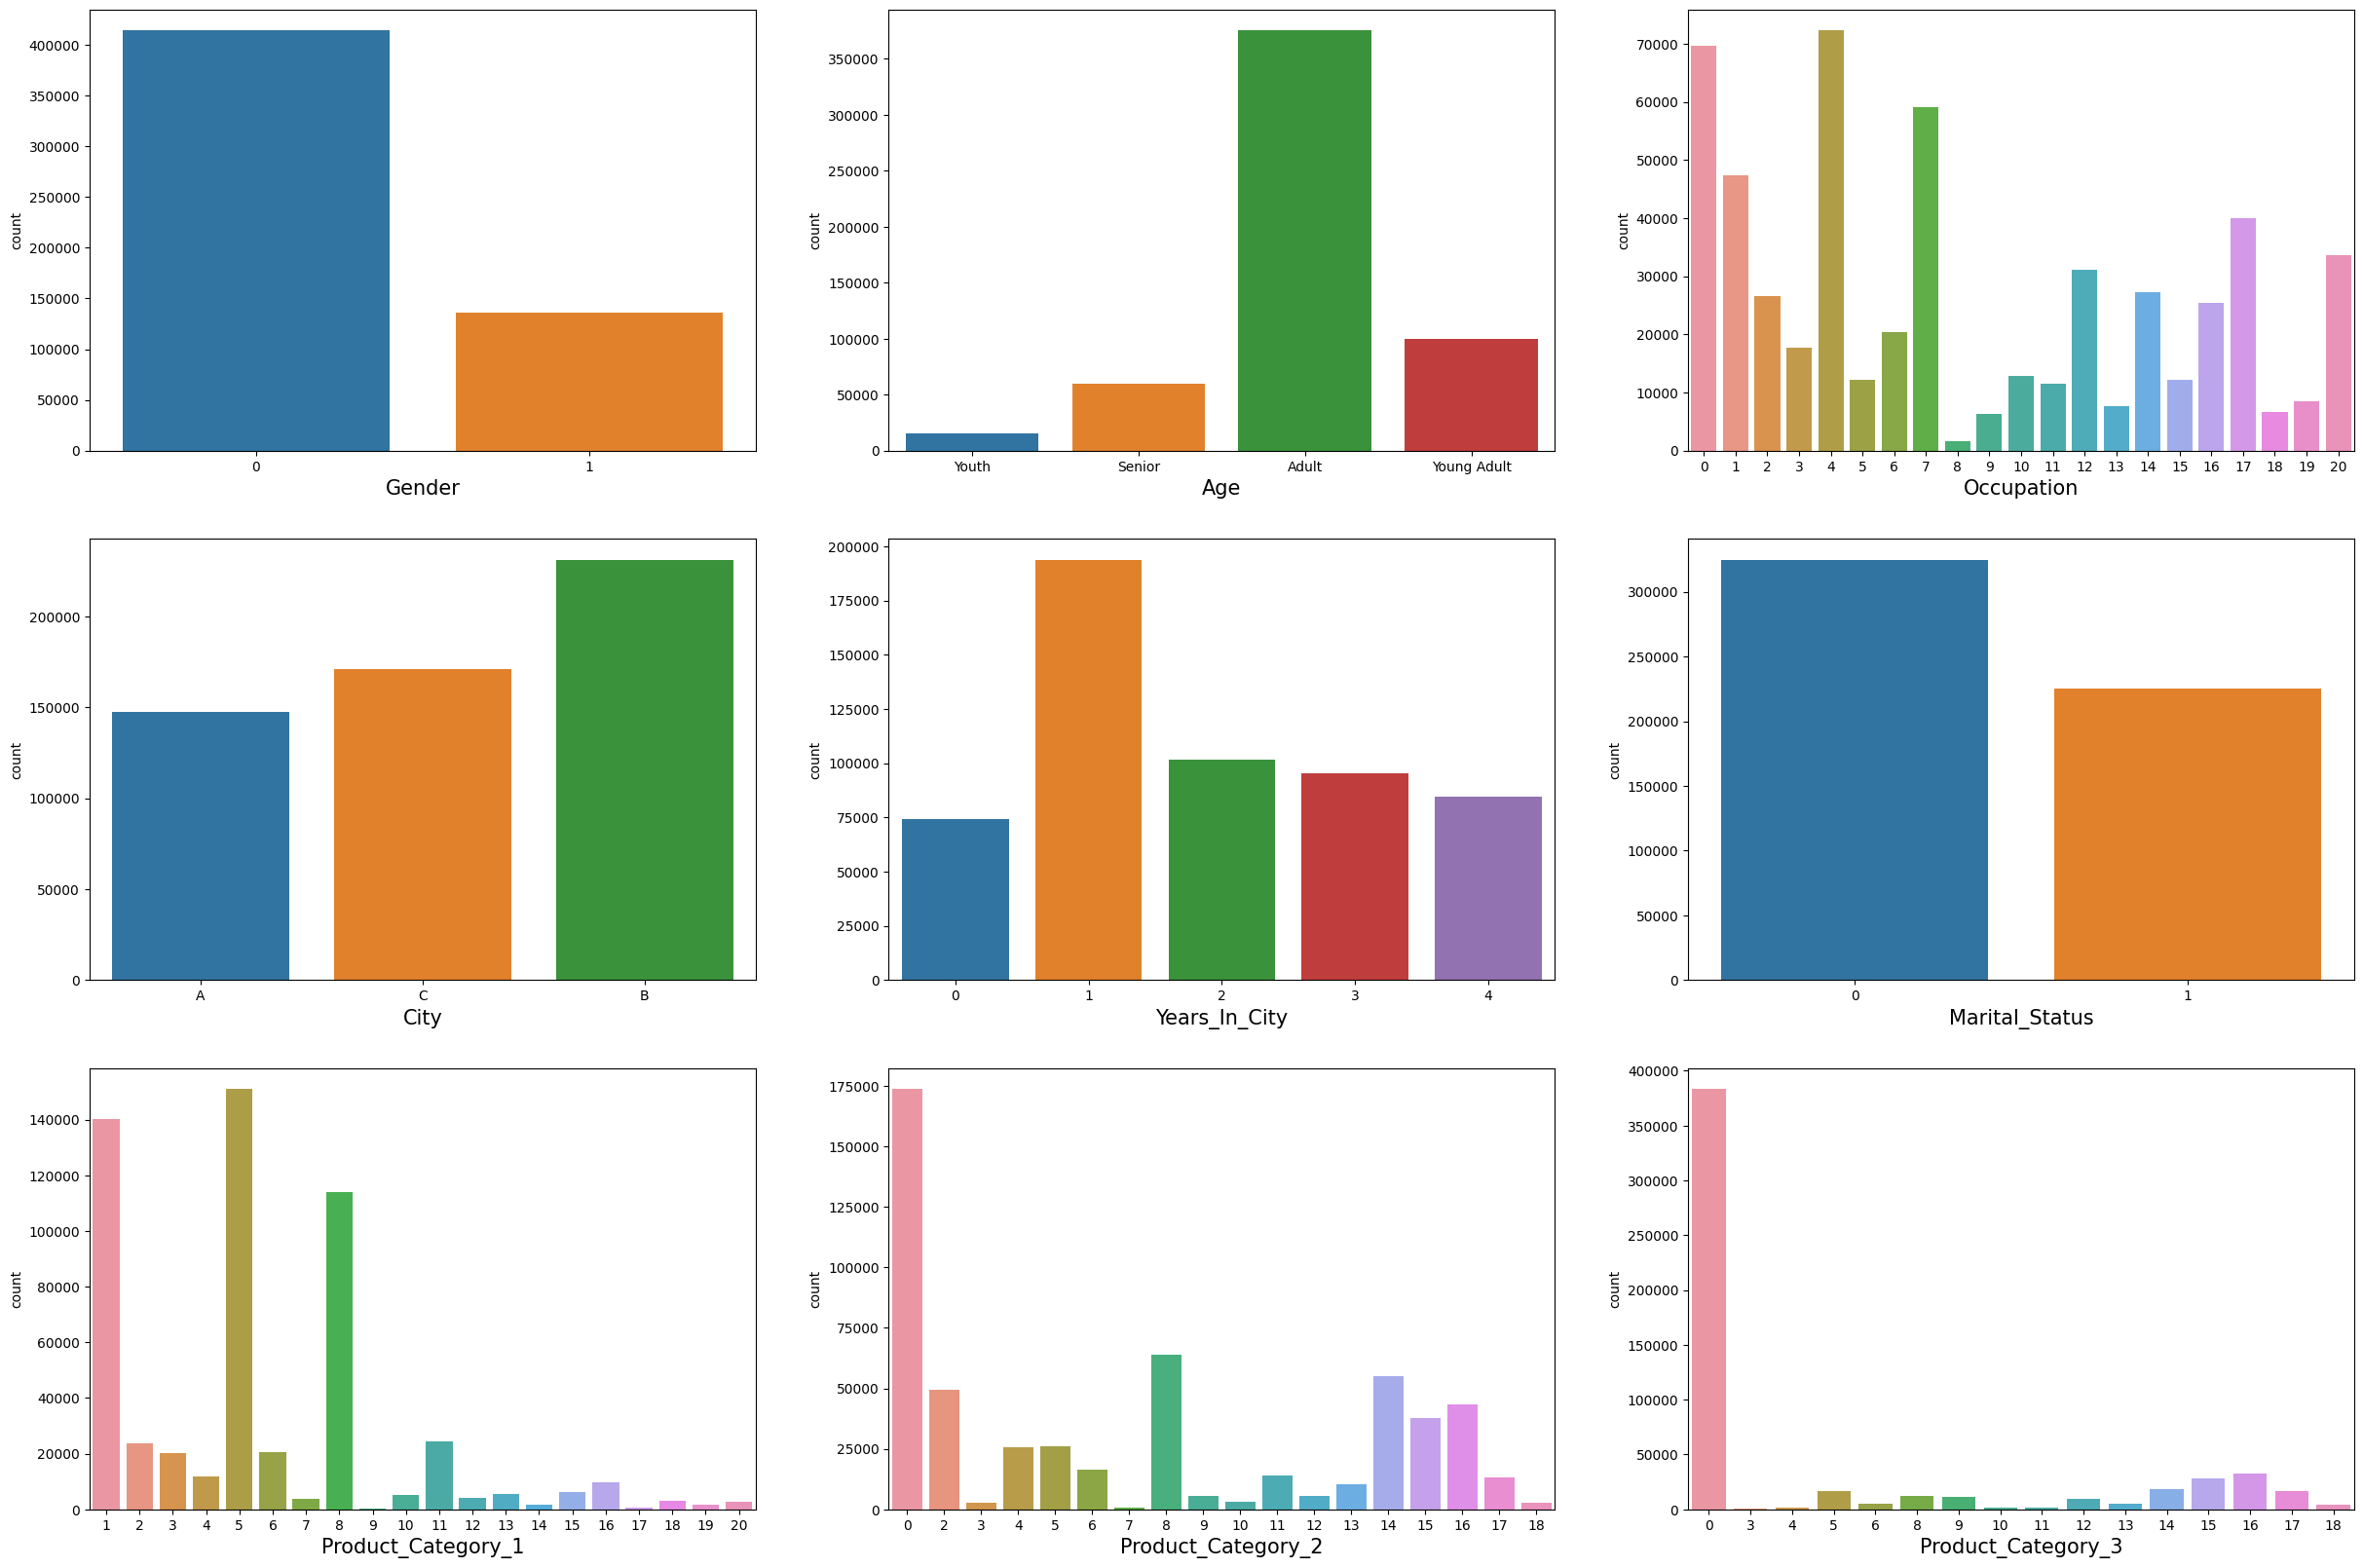

In [25]:
plt.figure(figsize = (30,20))
plot = 1
for i in col:
    if plot <=9:
        ax = plt.subplot(3,3, plot)
        sns.countplot(x = df[i], data = df)
        plt.xlabel(i, fontsize = 15)
    plot+=1
    
plt.show()

### Explanation of the Code

1. **Column List**:
    ```python
    col = ['Gender', 'Age', 'Occupation', 'City', 'Years_In_City', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']
    ```

    - **`col`**: This list contains the names of columns from the DataFrame `df` for which count plots will be created.

2. **Create a Figure with a Specific Size**:
    ```python
    plt.figure(figsize = (30,20))
    ```

    - **`plt.figure(figsize = (30,20))`**: This line creates a new figure for plotting with a width of 30 inches and a height of 20 inches. This large size is chosen to ensure that each plot is easily visible and not cramped.

3. **Initialize the Plot Counter**:
    ```python
    plot = 1
    ```

    - **`plot`**: This variable keeps track of the subplot index, starting from 1.

4. **Loop Through Columns and Create Subplots**:
    ```python
    for i in col:
        if plot <= 9:
            ax = plt.subplot(3, 3, plot)
            sns.countplot(x = df[i], data = df)
            plt.xlabel(i, fontsize = 15)
        plot += 1
    ```

    - **`for i in col:`**: This loop iterates through each column name in the `col` list.
    - **`if plot <= 9:`**: Ensures that only the first 9 columns are plotted in the 3x3 grid.
    - **`ax = plt.subplot(3, 3, plot)`**: Creates a subplot in a 3x3 grid layout. `plot` determines the position of the subplot (1 to 9).
    - **`sns.countplot(x = df[i], data = df)`**: Creates a count plot for the column `i`. The count plot shows the count of unique values in the column `i`.
    - **`plt.xlabel(i, fontsize = 15)`**: Sets the x-axis label of the subplot to the column name `i` with a font size of 15.
    - **`plot += 1`**: Increments the `plot` counter for the next subplot.

5. **Show the Plot**:
    ```python
    plt.show()
    ```

    - **`plt.show()`**: Displays the figure with all the subplots created.

### What the Code Does

- **Prepare the Plotting Area**: Sets up a large figure to accommodate multiple subplots in a grid format.
- **Create Subplots**: Iterates through the list of column names and creates count plots for the specified columns. The count plots show the distribution of each categorical variable.
- **Display the Plots**: Finally, it displays the figure with all the count plots arranged in a 3x3 grid.



<Axes: xlabel='Purchase', ylabel='Count'>

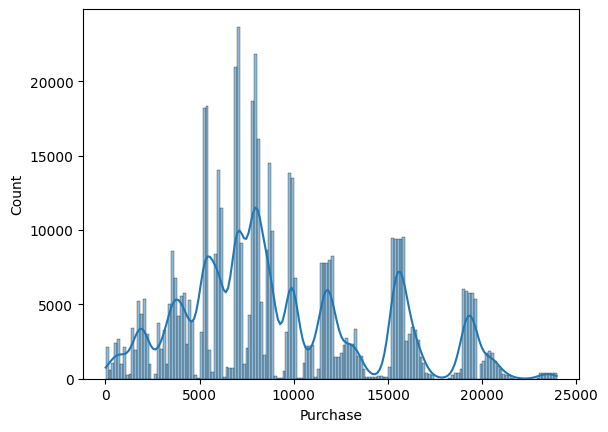

In [26]:
sns.histplot(x = df['Purchase'], kde = True)

### Code Explanation

```python
sns.histplot(x = df['Purchase'], kde = True)
```

#### 1. **`sns.histplot()`**:

   - **Function**: `histplot` is a function from the Seaborn library used to create histograms. Histograms visualize the distribution of a dataset by grouping data into bins and plotting the frequency of data points in each bin.

#### 2. **`x = df['Purchase']`**:

   - **Parameter**: `x` specifies the data to be plotted on the x-axis of the histogram.
   - **Data**: `df['Purchase']` refers to the `Purchase` column in the DataFrame `df`. This column contains the numerical data that you want to plot in the histogram.

#### 3. **`kde = True`**:

   - **Parameter**: `kde` is a boolean parameter that determines whether to overlay a Kernel Density Estimate (KDE) line on top of the histogram.
   - **`kde=True`**: When set to `True`, a KDE line is drawn over the histogram. The KDE line provides a smooth estimate of the probability density function of the data. It helps visualize the distribution of the data in a continuous manner, smoothing out the histogram's bar edges.

### What the Code Does

- **Histogram Creation**: The `sns.histplot` function creates a histogram for the `Purchase` column of the DataFrame `df`. The histogram shows the frequency distribution of the `Purchase` values.
- **KDE Line Overlay**: By setting `kde=True`, the code adds a KDE line on top of the histogram. The KDE line is a smoothed curve that represents the probability density function of the `Purchase` data. It helps in understanding the underlying distribution more clearly compared to the histogram alone.

### Visual Representation

The resulting plot will have:
- **Histogram Bars**: Displaying the count or frequency of `Purchase` values within specified bins.
- **KDE Line**: A smooth curve overlaid on the histogram, showing the estimated distribution of the `Purchase` data.


Here, the plot will show a histogram of `Purchase` values with an overlaid KDE line, helping to visually assess the distribution and density of the `Purchase` data.

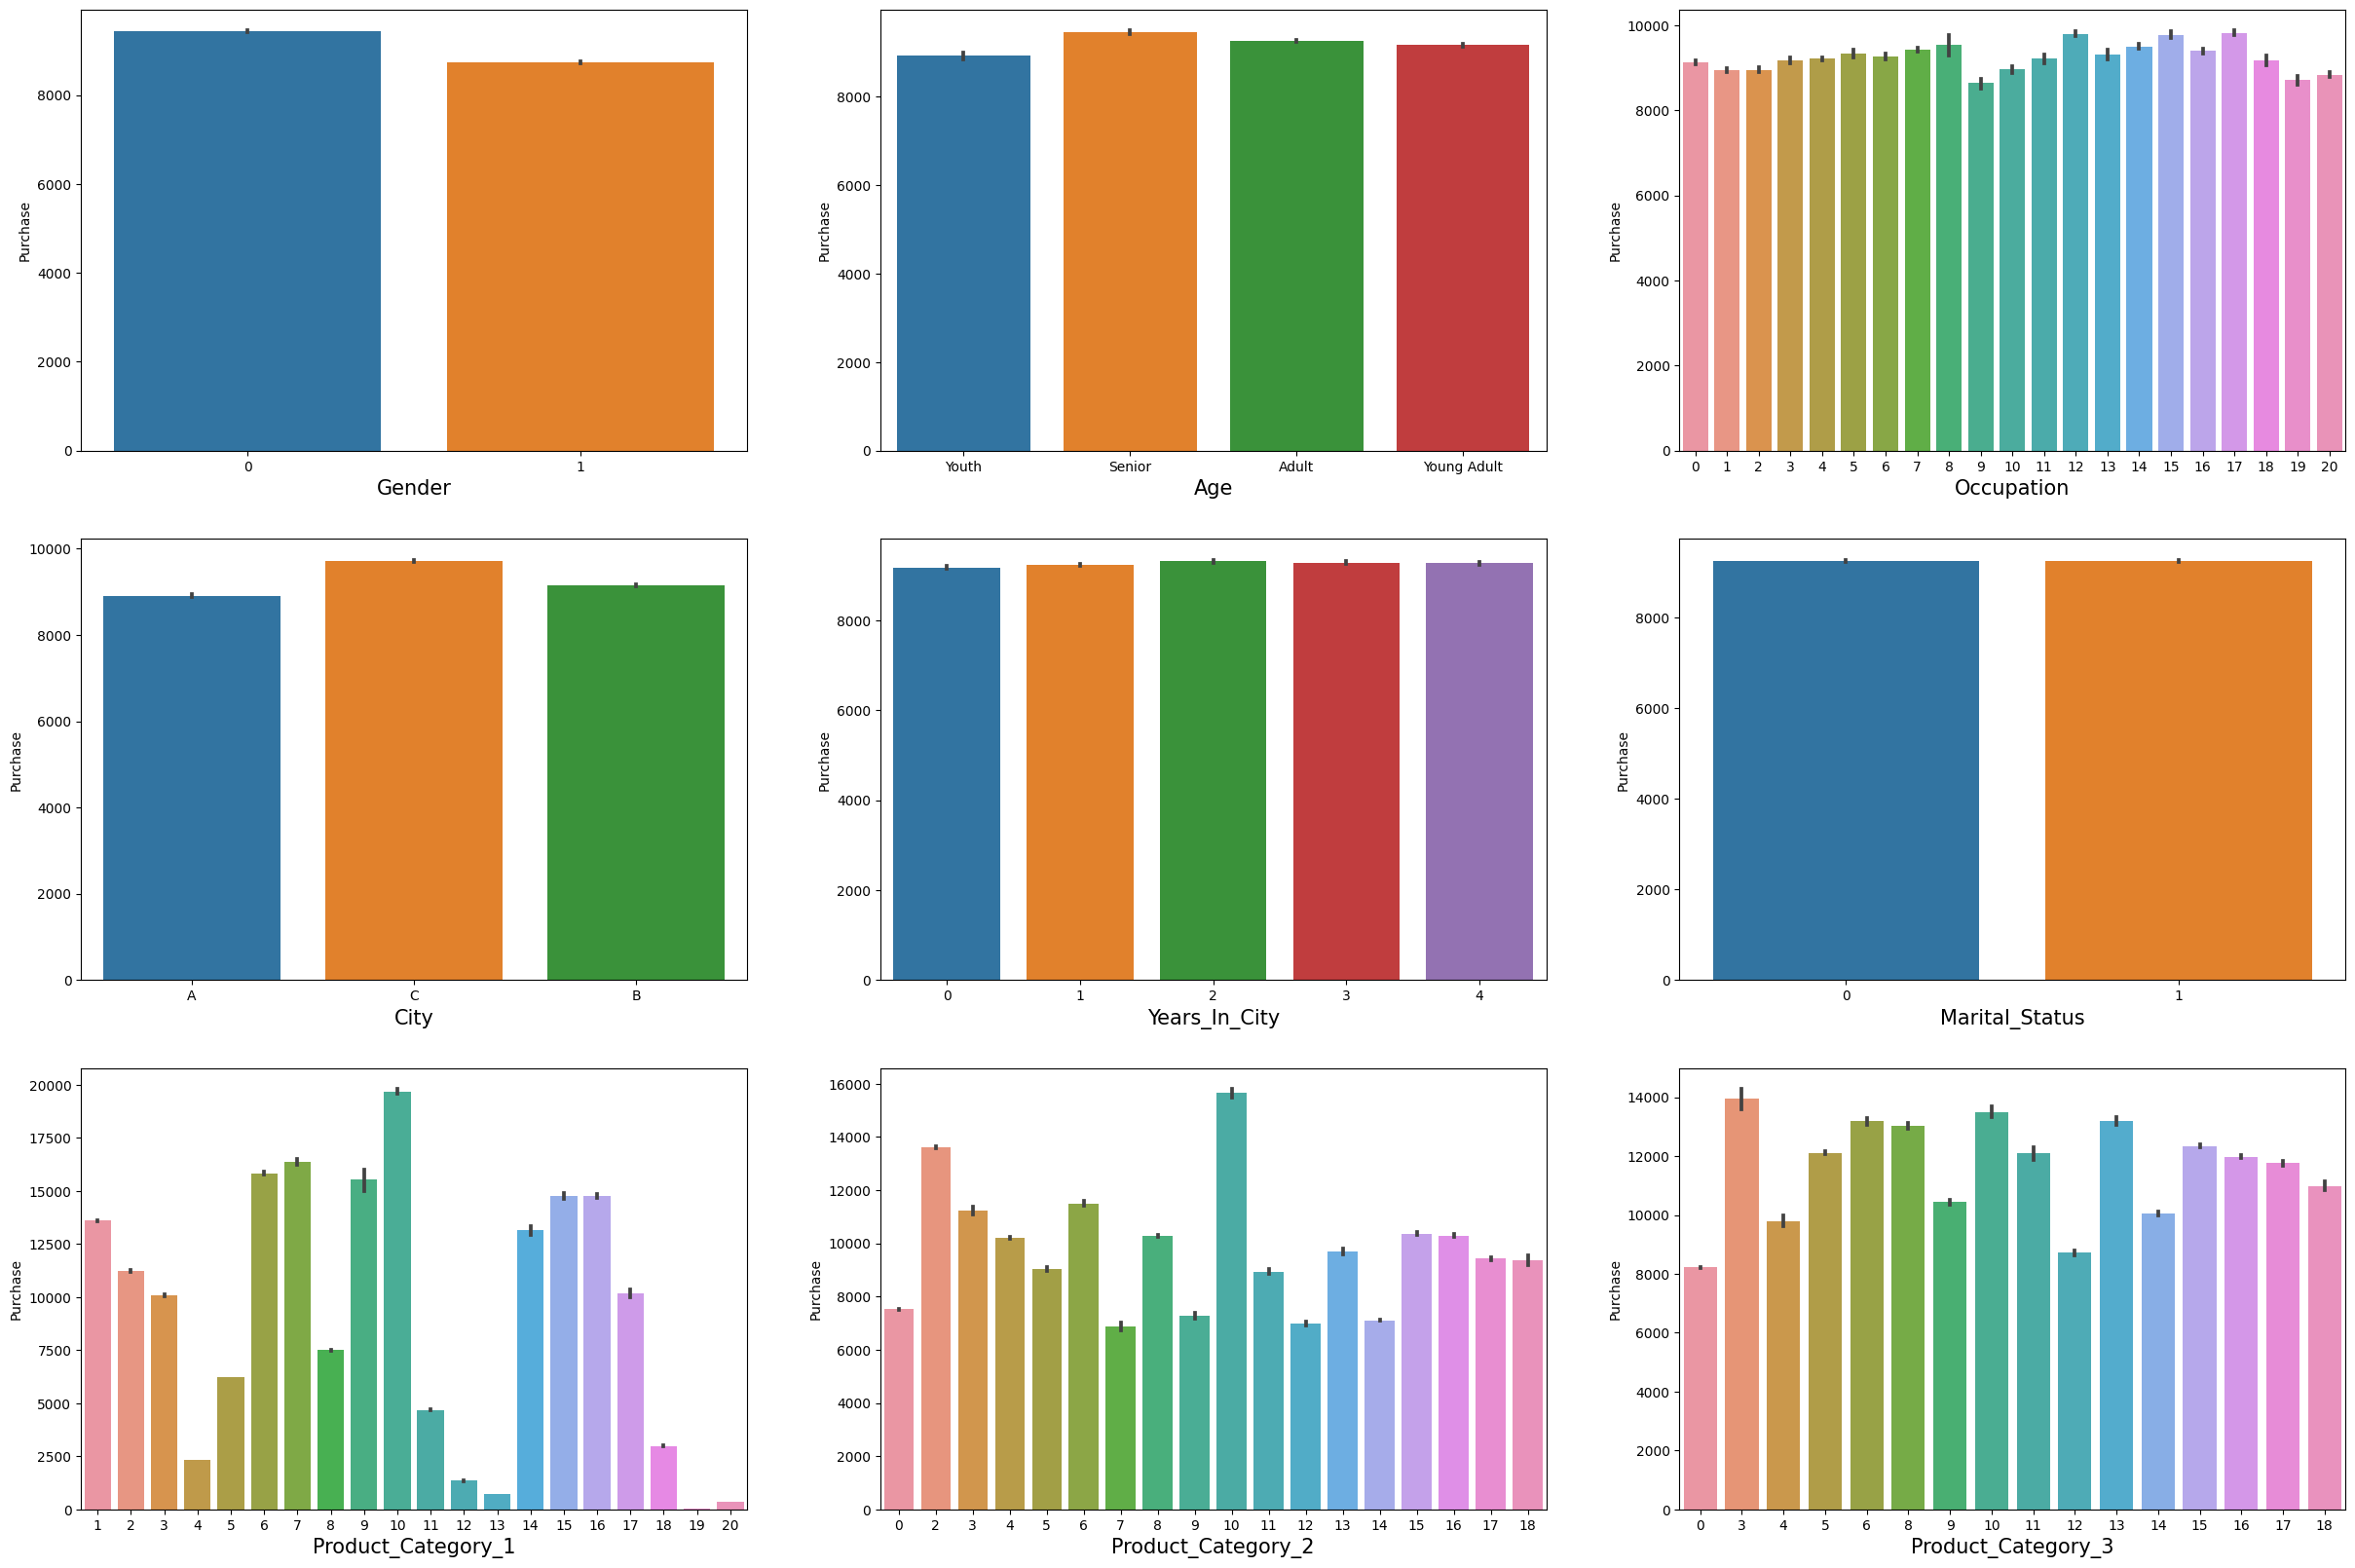

In [27]:
plt.figure(figsize = (30,20))
plot = 1
for i in col:
    if plot <=9:
        ax = plt.subplot(3,3, plot)
        sns.barplot(x = df[i], y = 'Purchase', data = df)
        plt.xlabel(i, fontsize = 15)
    plot+=1
    
plt.show()

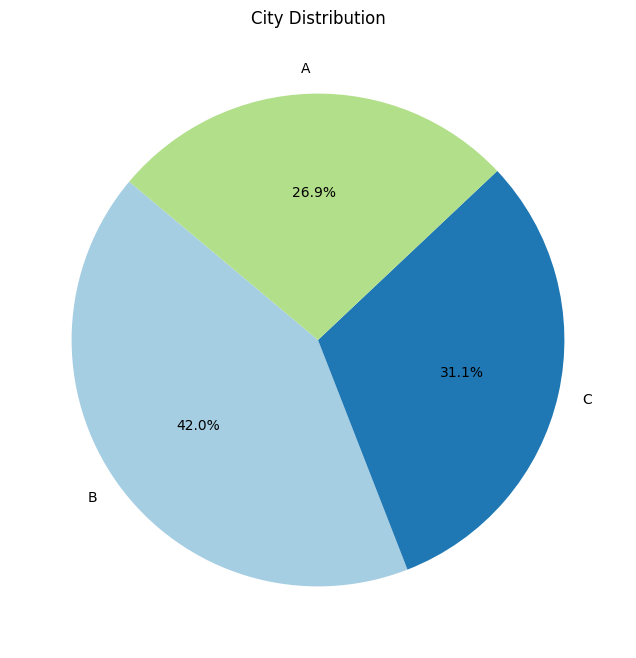

In [28]:
# Get the counts of each city
city_counts = df['City'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
city_counts.plot.pie(autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(city_counts))))

plt.title('City Distribution')
plt.ylabel('')  # Hides the y-label
plt.show()

### Code Explanation

1. **Get the Counts of Each City**:
    ```python
    city_counts = df['City'].value_counts()
    ```

    - **`df['City']`**: This selects the `City` column from the DataFrame `df`.
    - **`.value_counts()`**: This method counts the number of occurrences of each unique value in the `City` column. It returns a Series where the index is the unique city names and the values are the counts of each city.

2. **Create a Pie Chart**:
    ```python
    plt.figure(figsize=(8, 8))
    city_counts.plot.pie(autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(city_counts))))
    ```

    - **`plt.figure(figsize=(8, 8))`**: This line creates a new figure for plotting with a specified size of 8 inches by 8 inches. This sets up the plotting area for the pie chart.

    - **`city_counts.plot.pie(...)`**: This line generates a pie chart from the `city_counts` Series. It uses pandas' plotting capabilities (which are built on top of Matplotlib) to create the pie chart.
        - **`autopct='%1.1f%%'`**: This parameter formats the labels on the pie chart to show percentages with one decimal place.
        - **`startangle=140`**: This parameter rotates the start angle of the pie chart to 140 degrees. It adjusts the orientation of the pie chart for better visualization.
        - **`colors=plt.cm.Paired(range(len(city_counts)))`**: This parameter specifies the colors used in the pie chart. `plt.cm.Paired` is a colormap that provides a range of colors. `range(len(city_counts))` ensures that each slice of the pie gets a different color from the colormap.

3. **Customize the Plot**:
    ```python
    plt.title('City Distribution')
    plt.ylabel('')  # Hides the y-label
    plt.show()
    ```

    - **`plt.title('City Distribution')`**: This sets the title of the pie chart to 'City Distribution'.
    - **`plt.ylabel('')`**: This removes the y-axis label by setting it to an empty string. Pie charts don't typically have a y-axis, so this step is mostly about removing any default y-label.
    - **`plt.show()`**: This displays the pie chart.

### Summary

- **Calculate City Counts**: Counts the occurrences of each city in the `City` column and stores them in `city_counts`.
- **Create Pie Chart**: Sets up a figure and plots a pie chart showing the distribution of cities with customized colors, percentages, and orientation.
- **Customize and Display**: Adds a title, hides the y-label (which is irrelevant for pie charts), and displays the plot.


This code will generate a pie chart displaying the distribution of different cities, with each slice showing the percentage of occurrences for each city.

### Thank You for Visiting!
Thank you so much for taking the time to visit my Kaggle notebook! I hope you found the analysis informative and helpful. Your interest and support mean a lot to me.

If you have any questions, suggestions, or feedback, please feel free to leave a comment or reach out to me. Your input is invaluable in helping me improve and grow as a data scientist.

Once again, thank you for stopping by! Wishing you all the best in your data science journey.

Best regards,

Akanksha